In [23]:
import os
imdb_dir = '/home/home/Git/DataSets/IMDB_movie_reviews/aclImdb'
train_dir = os.path.join(imdb_dir,'train')

In [33]:
labels = []
texts = []
import glob
for label_type in ['neg','pos']:
    dir_name = os.path.join(train_dir,label_type)
    for fname in os.listdir(dir_name):
        if (fname[-4:] == '.txt'):
            f = open(os.path.join(dir_name,fname))
            texts.append(f.read())
            f.close()
            if label_type =='neg':
                labels.append(0)
            else :
                labels.append(1)

In [40]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('No.of unique tokens found are %s .' % len(word_index))
data = pad_sequences(sequences,maxlen=maxlen)

labels = np.asarray(labels)
print(data.shape)
print(labels.shape)

No.of unique tokens found are 88582 .
(25000, 100)
(25000,)


In [42]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]

x_val = data[training_samples:training_samples + validation_samples]
y_val = labels[training_samples:training_samples + validation_samples]

In [43]:
glove_dir = '/home/home/Git/DataSets/GloveEmbedding_2014_English_Wikipedia/'

embedding_index = {}
f = open(os.path.join(glove_dir,'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embedding_index[word] = coefs
f.close()
print('No. of word vectors are %s'%len(embedding_index))

No. of word vectors are 400000


In [44]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words,embedding_dim))
for word,i in word_index.items():
    if i<max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [45]:
from keras.models import Sequential
from keras.layers import Embedding,Flatten,Dense

model = Sequential()
model.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [49]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train,
                   epochs=10,
                   batch_size=32,
                   validation_data=(x_val,y_val))
model.save_weights('pretrained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 7ms/step - loss: 0.4546 - acc: 0.9200 - val_loss: 0.7492 - val_acc: 0.5702
Epoch 2/10
200/200 [==============================] - 1s 7ms/step - loss: 0.0378 - acc: 1.0000 - val_loss: 0.7768 - val_acc: 0.5674
Epoch 3/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0265 - acc: 1.0000 - val_loss: 0.7977 - val_acc: 0.5653
Epoch 4/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0197 - acc: 1.0000 - val_loss: 0.7858 - val_acc: 0.5684
Epoch 5/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0152 - acc: 1.0000 - val_loss: 0.8032 - val_acc: 0.5677
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0150 - acc: 1.0000 - val_loss: 0.8290 - val_acc: 0.5653
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0078 - acc: 1.0000 - val_loss: 1.1345 - val_acc: 0.5393
Epoch 8/10
200/200 [========

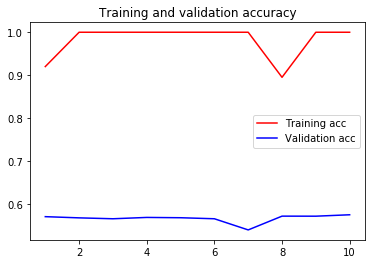

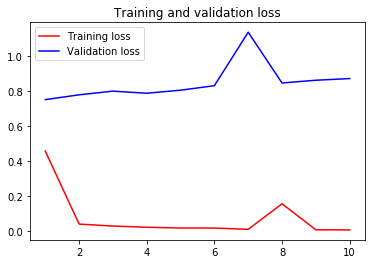

In [51]:
import matplotlib.pyplot as plt
def my_plot(h):  
    acc = h['acc']
    val_acc = h['val_acc']
    loss = h['loss']
    val_loss = h['val_loss']
    epochs = range(1,len(acc)+1)

    plt.plot(epochs,acc,'r',label='Training acc')
    plt.plot(epochs,val_acc,'b',label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()
    plt.plot(epochs,loss,'r',label='Training loss')
    plt.plot(epochs,val_loss,'b',label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()
my_plot(history.history)

In [52]:
#training maodel without pretrained word embedding

In [55]:
model1 = Sequential()
model1.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model1.add(Flatten())
model1.add(Dense(32,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()
model1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history1 = model1.fit(x_train,y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val,y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 2s 9ms/step - loss: 0.6934 - acc: 0.5100 - val_loss: 0.6934 - val_acc: 0.5214
Epoch 2/10
200/200 [==============================] - 1s 6ms/step - loss: 0.4553 - a

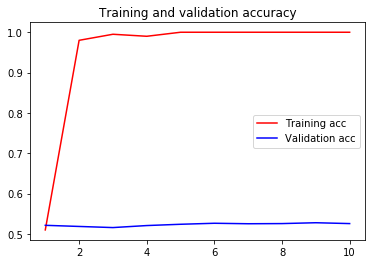

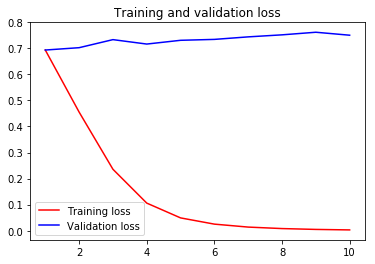

In [57]:
my_plot(history1.history)

In [58]:
test_dir = os.path.join(imdb_dir,'test')
labels = []
texts = []
for label_type in ['neg','pos']:
    dir_name = os.path.join(test_dir,label_type)
    for fname in sorted(os.listdir(dir_name)):
        if (fname[-4:] == '.txt'):
            f = open(os.path.join(dir_name,fname))
            texts.append(f.read())
            f.close()
            if label_type =='neg':
                labels.append(0)
            else :
                labels.append(1)

In [60]:
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences,maxlen=maxlen)
y_test = np.asarray(labels)

In [61]:
model.evaluate(x_test,y_test)

25000/25000 [==============================] - 3s 109us/step


[0.8692539706039428, 0.56888]

In [62]:
model1.evaluate(x_test,y_test)

25000/25000 [==============================] - 3s 110us/step


[0.7551336674499511, 0.5228]